# **Day - 5 | Handwritten Digit Recognition | SVM**

### *Importing Basic Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import svm
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger

### *Importing Dataset*

In [2]:
dataset = pd.read_csv('data1.csv')
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
matplotlib_axes_logger.setLevel('ERROR')
zero_one_colourmap = ListedColormap(('red', 'green'))

### *Summarize Dataset*

In [4]:
print(dataset.speechiness)
print(dataset.loudness)

dataLength = len(dataset.key)
print(dataLength)

0      0.0477
1      0.3060
2      0.0419
3      0.0585
4      0.2220
        ...  
190    0.0520
191    0.0565
192    0.0448
193    0.0965
194    0.1970
Name: speechiness, Length: 195, dtype: float64
0      -6.764
1      -7.951
2     -27.528
3      -6.994
4      -7.516
        ...  
190   -19.494
191   -11.630
192   -11.509
193    -5.838
194    -7.845
Name: loudness, Length: 195, dtype: float64
195


In [5]:
dataset['key'].value_counts()

1     30
8     22
6     20
7     19
5     18
9     18
10    17
2     15
0     12
11    10
4      9
3      5
Name: key, dtype: int64

### *Visualize the Dataset*

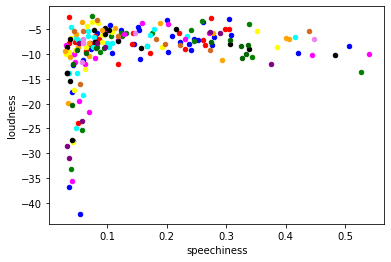

In [6]:
key_one = dataset[dataset['key']==1][0:200]
key_two = dataset[dataset['key']==8][0:200]
key_three = dataset[dataset['key']==6][0:200]
key_four = dataset[dataset['key']==7][0:200]
key_five = dataset[dataset['key']==9][0:200]
key_six = dataset[dataset['key']==5][0:200]
key_seven = dataset[dataset['key']==10][0:200]
key_eight = dataset[dataset['key']==2][0:200]
key_nine = dataset[dataset['key']==0][0:200]
key_ten = dataset[dataset['key']==11][0:200]
key_eleven = dataset[dataset['key']==4][0:200]
key_twelve = dataset[dataset['key']==3][0:200]

axes = key_one.plot(kind='scatter', x='speechiness', y='loudness', color='blue')
ax = key_two.plot(kind='scatter', x='speechiness', y='loudness', color='green', ax=axes)
ax = key_three.plot(kind='scatter', x='speechiness', y='loudness', color='red', ax=axes)
ax = key_four.plot(kind='scatter', x='speechiness', y='loudness', color='cyan', ax=axes)
ax = key_five.plot(kind='scatter', x='speechiness', y='loudness', color='magenta', ax=axes)
ax = key_six.plot(kind='scatter', x='speechiness', y='loudness', color='yellow', ax=axes)
ax = key_seven.plot(kind='scatter', x='speechiness', y='loudness', color='black', ax=axes)
ax = key_eight.plot(kind='scatter', x='speechiness', y='loudness', color='orange', ax=axes)
ax = key_nine.plot(kind='scatter', x='speechiness', y='loudness', color='darkgreen', ax=axes)
ax = key_ten.plot(kind='scatter', x='speechiness', y='loudness', color='chocolate', ax=axes)
ax = key_eleven.plot(kind='scatter', x='speechiness', y='loudness', color='purple', ax=axes)
ax = key_twelve.plot(kind='scatter', x='speechiness', y='loudness', color='violet', ax=axes)

In [7]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=10, cmap=zero_one_colourmap)
  ax.set_xlabel('speechiness')
  ax.set_ylabel('loudness')
  ax.set_zlabel('key')
  return ax

In [8]:
def plot_hyperplane(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
  plt.title('SVM Hyperplane')
  plt.xlabel('Speechiness')
  plt.ylabel('Loudness')
  plt.legend()
  return plt.show()

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

### *Input - Pixel | Output - Class*

In [9]:
X = dataset.loc[:, ["speechiness", "loudness"]].values
X

array([[ 4.7700e-02, -6.7640e+00],
       [ 3.0600e-01, -7.9510e+00],
       [ 4.1900e-02, -2.7528e+01],
       [ 5.8500e-02, -6.9940e+00],
       [ 2.2200e-01, -7.5160e+00],
       [ 1.2500e-01, -6.4150e+00],
       [ 3.2400e-01, -8.4050e+00],
       [ 1.7100e-01, -6.0240e+00],
       [ 4.9800e-02, -7.0630e+00],
       [ 4.4700e-01, -6.9950e+00],
       [ 1.1800e-01, -7.1730e+00],
       [ 2.4100e-01, -9.1900e+00],
       [ 1.5100e-01, -4.5050e+00],
       [ 2.2000e-01, -5.7820e+00],
       [ 7.4100e-02, -2.3360e+00],
       [ 3.0900e-02, -9.9060e+00],
       [ 1.2300e-01, -5.6500e+00],
       [ 8.7400e-02, -9.4820e+00],
       [ 1.5400e-01, -1.0889e+01],
       [ 2.4100e-01, -5.2020e+00],
       [ 2.0200e-01, -3.8320e+00],
       [ 6.9500e-02, -2.1686e+01],
       [ 6.3100e-02, -8.6000e+00],
       [ 3.7600e-01, -1.2028e+01],
       [ 4.4400e-01, -1.0104e+01],
       [ 2.3700e-01, -7.9080e+00],
       [ 5.1400e-02, -7.7120e+00],
       [ 3.8500e-01, -8.5460e+00],
       [ 2.9700e-01,

In [10]:
Y = dataset.loc[:, "key"].values
Y

array([ 7, 10,  1,  3,  1,  8,  0,  7,  7,  3,  9,  1,  1,  6,  8,  5,  8,
        8,  1,  8,  9,  9,  5,  4,  9,  1,  4,  5,  6,  8,  7,  6,  1, 10,
        0,  4,  7,  1,  8, 11,  8,  1,  5,  3,  8,  1, 11,  2,  1,  1, 10,
        2,  5,  0,  8,  2,  0,  2,  8,  8,  2,  5,  6,  5,  8,  8,  1,  5,
        0,  8,  1, 11, 10,  1,  1,  6, 10,  9,  6,  4,  9,  0, 11,  1,  2,
        4,  1,  8,  9,  5,  1, 10,  2, 10,  9,  0, 10,  7,  7,  6,  7,  2,
        5, 10,  9,  6, 10,  7, 10,  1,  0,  6,  8,  2,  7,  1,  5,  9,  6,
        1,  9,  9, 11,  1,  8,  1,  1,  6,  6,  7,  7,  6,  8,  7,  4,  5,
        2, 11,  4,  2,  9,  6,  4,  4,  8,  3,  8,  2,  5, 10,  6,  0,  7,
        6, 10,  5,  1,  6,  1,  8,  6,  9,  6, 11,  7,  7,  0, 10,  5, 11,
        7,  9,  1,  2,  5, 10,  2,  1,  0,  7,  2,  7,  5, 10,  5,  9, 11,
        1,  0,  6,  9,  3,  9, 10, 11], dtype=int64)

<Axes3DSubplot:xlabel='speechiness', ylabel='loudness'>

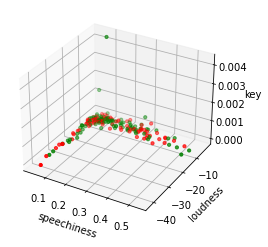

In [11]:
plot_3d_plot(X,Y)

### *Splitting Dataset into Train & Test*

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(146, 2)
(49, 2)


### *Normalization*

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
print("Key training data",X_train)
print("Key test data",X_test)

Key training data [[0.03748536 0.90872887]
 [0.02948067 0.80721353]
 [0.81257321 0.80543519]
 [0.09683717 0.89442705]
 [0.48457634 0.85212273]
 [0.08766107 0.85365059]
 [0.05017571 0.65638071]
 [0.4552909  0.8803757 ]
 [0.3361968  0.98159048]
 [0.41624365 0.9282154 ]
 [0.14486529 0.93202254]
 [0.         0.82607389]
 [0.2014838  0.91371321]
 [0.05857087 0.42236694]
 [0.1858649  0.91699436]
 [0.73643108 0.8833062 ]
 [0.4552909  0.97304947]
 [0.02616166 0.365335  ]
 [0.00819992 0.71221039]
 [0.02538071 0.61550407]
 [0.09996095 0.87201002]
 [0.36548223 0.93560426]
 [0.26981648 0.84946775]
 [0.03319016 0.77024421]
 [0.09039438 1.        ]
 [0.69738383 0.84445836]
 [0.04080437 0.71524108]
 [0.3518157  0.89865999]
 [0.17415072 0.89865999]
 [0.0560328  0.76721353]
 [0.04724717 0.57024421]
 [0.0447091  0.46066374]
 [0.02752831 0.36901691]
 [0.0964467  0.86399499]
 [0.11304178 0.88275517]
 [0.45138618 0.97635567]
 [0.23272159 0.91666875]
 [0.17610308 0.87884784]
 [0.29519719 0.93462743]
 [0.061

### *Training*

In [14]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

### *Predicting, what the digit is from Test Data*

### *Prediction for Test Data*

In [15]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1  1]
 [ 1  1]
 [ 1 10]
 [ 1  2]
 [ 1  9]
 [ 1  4]
 [ 1 11]
 [ 1  8]
 [ 1  1]
 [ 1  1]
 [ 1  7]
 [ 1  8]
 [ 1  1]
 [ 1  9]
 [ 1  7]
 [ 1  7]
 [ 1  1]
 [ 1  2]
 [ 1  8]
 [ 1  6]
 [ 1  0]
 [ 1  2]
 [ 1  2]
 [ 1  5]
 [ 1  5]
 [ 1  2]
 [ 1  0]
 [ 1  0]
 [ 1 10]
 [ 1  1]
 [ 1  5]
 [ 1  5]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  9]
 [ 1  0]
 [ 1 10]
 [ 1  6]
 [ 1  4]
 [ 1  2]
 [ 1  4]
 [ 1 11]
 [ 1  7]
 [ 1  5]
 [ 1  7]
 [ 1 11]
 [ 1  2]
 [ 1  6]]


### *Evaluate Model - Accuracy Score*

In [16]:
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 20.408163265306122%


### *Linear kernel*

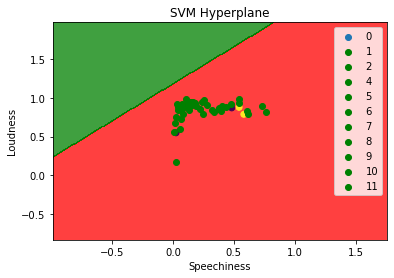

Accuracy of the Model 1: 20.408163265306122%


In [17]:
model1 = svm.SVC(kernel='linear')
model1.fit(X_train,y_train)
y_predModel1 = model1.predict(X_test)
plot_hyperplane(X_test,y_test,model1)
print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))

### *Gaussian Kernel*

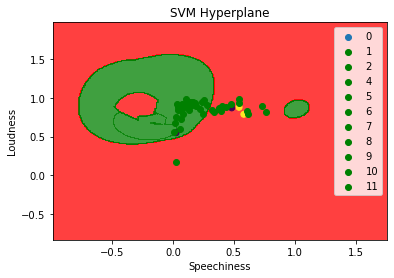

Accuracy of the Model 2: 14.285714285714285%


In [18]:
model2 = svm.SVC(kernel='rbf')
model2.fit(X_train,y_train)
y_predModel2 = model2.predict(X_test)
plot_hyperplane(X_test,y_test,model2)
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))

### *hyperparameter*

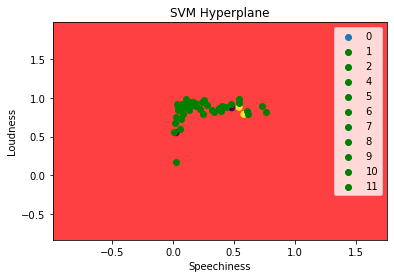

Accuracy of the Model 3: 20.408163265306122%


In [19]:
model3 = svm.SVC(kernel='rbf', random_state=1, gamma=0.001)
model3.fit(X_train,y_train)
y_predModel3 = model3.predict(X_test)
plot_hyperplane(X_test,y_test,model3)
print("Accuracy of the Model 3: {0}%".format(accuracy_score(y_test, y_predModel3)*100))

### *hyperparameter and cost*

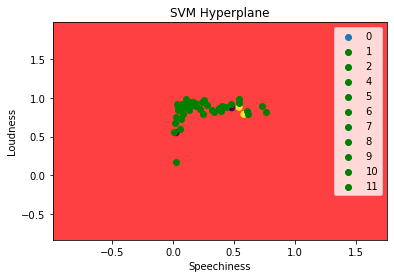

Accuracy of the Model 4: 20.408163265306122%


In [20]:
model4 = svm.SVC(kernel='rbf', random_state=2, gamma=0.001, C=0.1)
model4.fit(X_train,y_train)
y_predModel4 = model4.predict(X_test)
plot_hyperplane(X_test,y_test,model4)
print("Accuracy of the Model 4: {0}%".format(accuracy_score(y_test, y_predModel4)*100))